In [1]:
#pip install opencv-python
#pip install cmake
#pip install face_recognition

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from cvloop import cvloop
import face_recognition

# 1. Face Detection

# without cvloop

In [42]:
def face_detection(path):
    frame = cv2.imread(path)
    face_locations = face_recognition.face_locations(frame)
    for (t,r,b,l) in face_locations:
        frame = cv2.rectangle(frame,(l,t),(r,b),(0,0,255),4)
    plt.imshow(frame) 

<IPython.core.display.Javascript object>


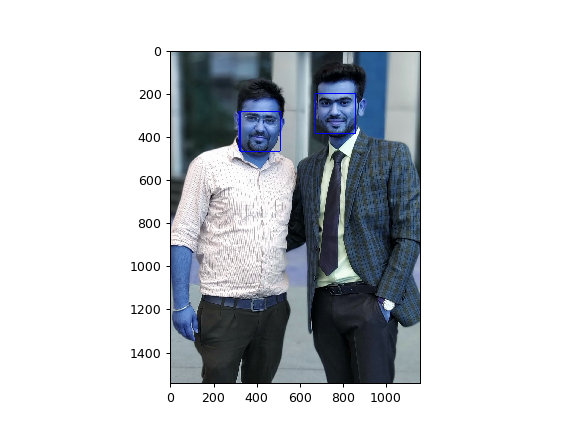

In [43]:
face_detection('./sample_images/sourav_aman.jpg')

# with cvloop

In [26]:
#with cvloop
def face_detection(frame):
    face_locations = face_recognition.face_locations(frame)
    for (t,r,b,l) in face_locations:
        frame = cv2.rectangle(frame,(l,t),(r,b),(0,0,255),4)
    return frame

<IPython.core.display.Javascript object>


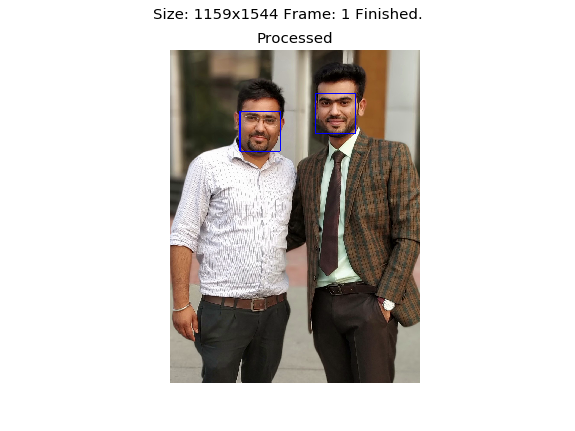

In [30]:
#Image
cvloop('./sample_images/sourav_aman.jpg', function=face_detection)

<IPython.core.display.Javascript object>


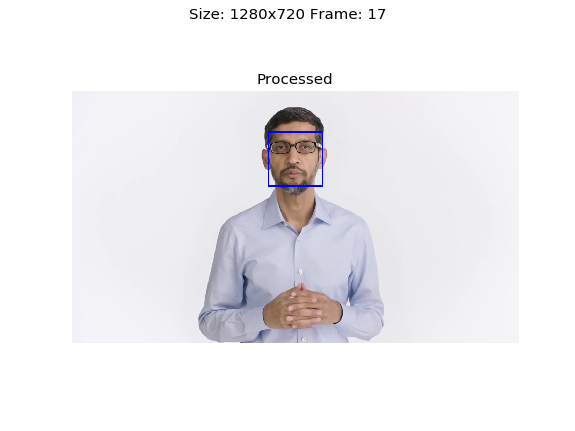

In [31]:
#Recorded Video
cvloop('./sample_videos/sundar_pichai.mp4',function = face_detection)

# 2. Face Landmarks

In [63]:
def face_landmarks(frame):
    face_landmarks = face_recognition.face_landmarks(frame)
    
    for i in face_landmarks:
        for j in list(i.values()):
            pts = np.array(j,np.int32)
            frame = cv2.polylines(frame,[pts],False,(0,255,255),4)
            
    return frame       

<IPython.core.display.Javascript object>


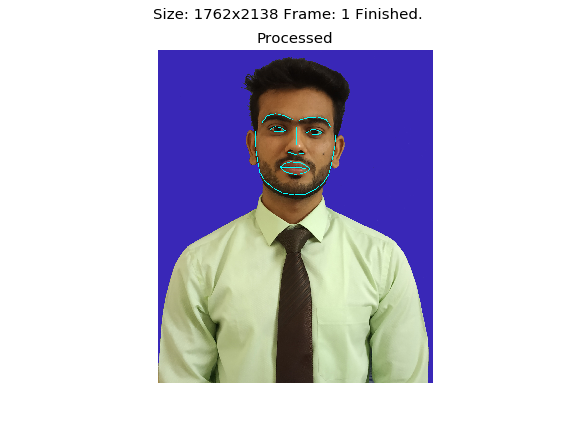

In [64]:
#image
cvloop('./sample_images/sourav1.jpg',function=face_landmarks)

<IPython.core.display.Javascript object>


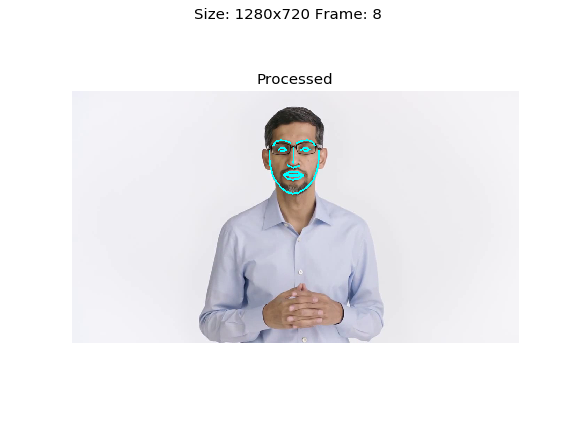

In [65]:
#Recorded Video
cvloop('./sample_videos/sundar_pichai.mp4',function = face_landmarks)

# 3. Face Recognition

In [79]:
#known_img = cv2.imread('./sample_images/sundar_pichai.jpg')                       ##mtd1
known_img = face_recognition.load_image_file('./sample_images/sundar_pichai.jpg')  #mtd2
known_encoding = face_recognition.face_encodings(known_img)[0]

In [80]:
def face_recog(frame):
    
    #compare encodings
    unknown_encoding = face_recognition.face_encodings(frame)[0]
    results = face_recognition.compare_faces([known_encoding],unknown_encoding)
    
    name = 'unknown'
    if results[0] ==True:
        name='sundar pichai'
    
    face_locations = face_recognition.face_locations(frame)
    for (t,r,b,l) in face_locations:
        frame = cv2.rectangle(frame,(l,t),(r,b),(0,0,255),4)
        frame = cv2.putText(frame, name, (l,t), cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,0),thickness=2)
    return frame

<IPython.core.display.Javascript object>


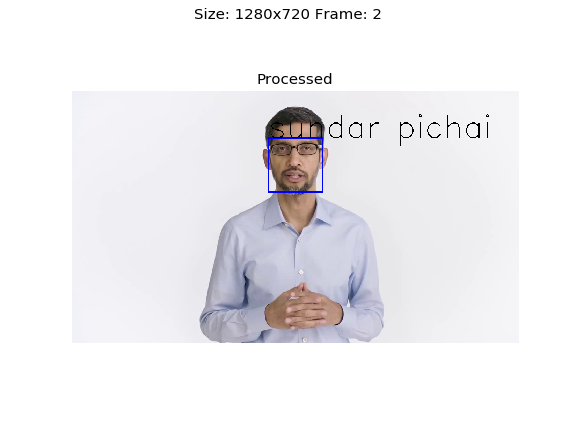

In [81]:
#Recorded Video
cvloop('./sample_videos/sundar_pichai.mp4',function = face_recog)

<IPython.core.display.Javascript object>


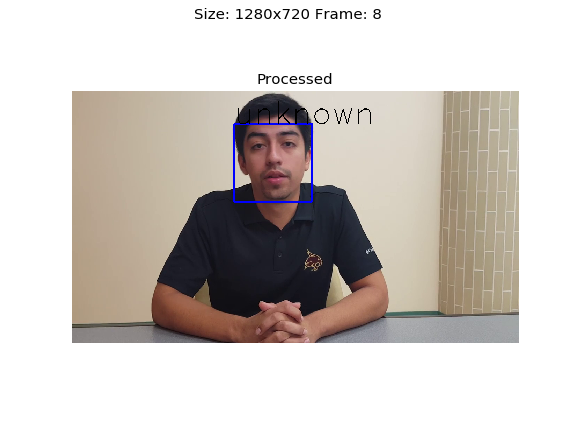

In [82]:
#Recorded Video
cvloop('./sample_videos/sample_interview.mp4',function = face_recog)